<a href="https://colab.research.google.com/github/GodjaVasile2/Data_Science_Methods_CourseProject/blob/main/Detect_Hate_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.

In [ ]:
#Dataset import
from datasets import load_dataset
raw_dateset = load_dataset('hate_speech18')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for hate_speech18 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hate_speech18.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/10944 [00:00<?, ? examples/s]

In [ ]:
#First look at the dataset
print(raw_dateset)

DatasetDict({
    train: Dataset({
        features: ['text', 'user_id', 'subforum_id', 'num_contexts', 'label'],
        num_rows: 10944
    })
})


In [ ]:
#I use pandas in order to transform the dataset in a df and show some basic info
df = raw_dateset['train'].to_pandas()

print(df.head())
print(df.info())

                                                text  user_id  subforum_id  \
0  As of March 13th , 2014 , the booklet had been...   572066         1346   
1  In order to help increase the booklets downloa...   572066         1346   
2  ( Simply copy and paste the following text int...   572066         1346   
3  Click below for a FREE download of a colorfull...   572066         1346   
4  Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...   572066         1346   

   num_contexts  label  
0             0      0  
1             0      0  
2             0      0  
3             0      1  
4             0      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10

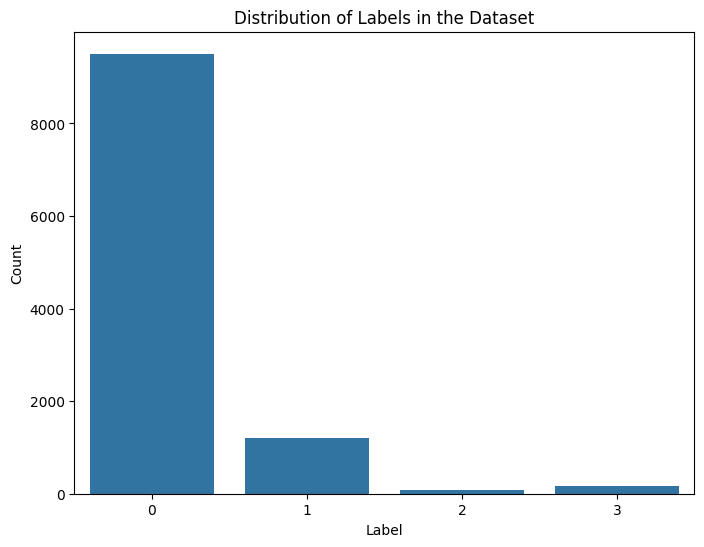

In [ ]:
# First look at th distribution of the 'label' column
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()



In [ ]:
# Drop unnecessary columns and filtre out label 2 and 3
df = df.drop(columns=['user_id', 'subforum_id', 'num_contexts'])
df = df[df['label'] != 2]
df = df[df['label'] != 3]

In [ ]:
!pip install tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46730 sha256=6554de8098b07946ff100186b329eb096f43513634a7dff29cd063ae69e804a9
  Stored in directory: /root/.cache/pip/wheels/c0/d0/70/a33bd4bed2af4f7038b038c16faab552cd0e9d9f4125223a71
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32868 sha256=dba01e451df2a366e2dc6388d7d704f03b4fec03eef968dafefe061e0ef5c836
  Stored in directory: /root/.cache/pip/wheels/5a/eb/7c/3b6f0c25815749883152b2caca34c35dbaab13ec2864270cbd
Successfully built tools pytils


In [ ]:
# Cleaning steps:
# Remove special characters
# Convert to lowercase
# Remove newlines
# Remove leading and trailing spaces
# Remove extra spaces
# Remove stopwords and lemmatize

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


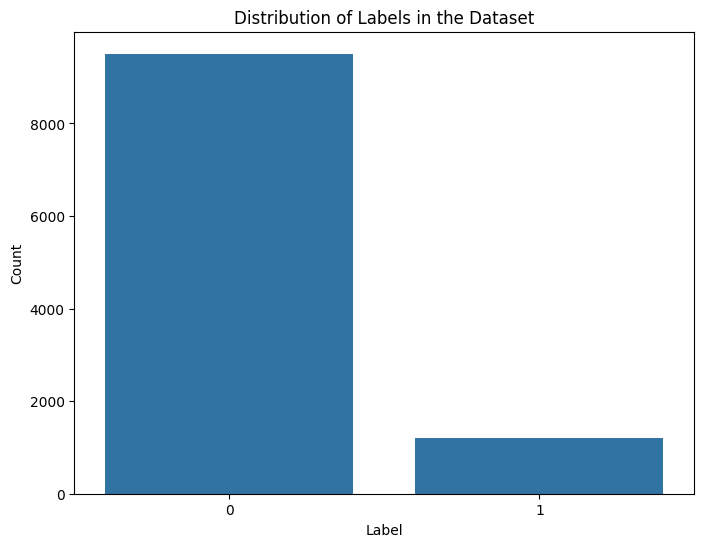

                                                text  label  \
0          march th booklet downloaded time counting      0   
1  order help increase booklet downloads would gr...      0   
2  simply copy paste following text youtube video...      0   
3  click free download colorfully illustrated pag...      1   
4                click download mb green banner link      0   

                                            original  \
0          march th booklet downloaded time counting   
1  order help increase booklet downloads would gr...   
2  simply copy paste following text youtube video...   
3  click free download colorfully illustrated pag...   
4                click download mb green banner link   

                           remove_special_characters  \
0          march th booklet downloaded time counting   
1  order help increase booklet downloads would gr...   
2  simply copy paste following text youtube video...   
3  click free download colorfully illustrated pag...   
4   

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
print(df.head())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd


#Split the dataset 70/30
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)


# Training and predictions with LinearSVC
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(C=0.9)),
])

pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)



# Training and predictions with RandomForest
pipeline_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)



# Training and predictions with Naive Bayes
pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)



results = {
    "Model": ["LinearSVC", "Random Forest", "Naive Bayes"],
    "Accuracy": [accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nb)],
    "Precision": [precision_score(y_test, y_pred_svc, average='macro'), precision_score(y_test, y_pred_rf, average='macro'), precision_score(y_test, y_pred_nb, average='macro')],
    "Recall": [recall_score(y_test, y_pred_svc, average='macro'), recall_score(y_test, y_pred_rf, average='macro'), recall_score(y_test, y_pred_nb, average='macro')],
    "F1-Score": [f1_score(y_test, y_pred_svc, average='macro'), f1_score(y_test, y_pred_rf, average='macro'), f1_score(y_test, y_pred_nb, average='macro')]
}
results_df = pd.DataFrame(results)
print(results_df)



           Model  Accuracy  Precision    Recall  F1-Score
0      LinearSVC  0.901588   0.757458  0.625714  0.661040
1  Random Forest  0.898474   0.807807  0.547988  0.561334
2    Naive Bayes  0.891934   0.445967  0.500000  0.471440


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=200)
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create and compile the model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Pperform training with given parameters
def train_model(batch_size, epochs, initial_lr):
    model = create_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Learning rate scheduler
    def scheduler(epoch, lr):
        if epoch < epochs * 0.5:
            return lr
        elif epoch < epochs * 0.75:
            return lr * 0.1
        else:
            return lr * 0.01

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,
                        callbacks=[lr_scheduler, early_stopping, model_checkpoint], verbose=1)

    model.load_weights('best_model.h5')
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy


accuracy_1 = train_model(batch_size=32, epochs=10, initial_lr=0.001)
print(f"Setup 1 - Accuracy: {accuracy_1}")


accuracy_2 = train_model(batch_size=64, epochs=20, initial_lr=0.0005)
print(f"Setup 2 - Accuracy: {accuracy_2}")

accuracy_3 = train_model(batch_size=128, epochs=30, initial_lr=0.0001)
print(f"Setp 3 - Accuracy: {accuracy_3}")



Epoch 1/10
188/188 [==============================] - 89s 441ms/step - loss: 0.3466 - accuracy: 0.8847 - val_loss: 0.3037 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 75s 397ms/step - loss: 0.2099 - accuracy: 0.9261 - val_loss: 0.3108 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 3/10
188/188 [==============================] - 76s 405ms/step - loss: 0.1308 - accuracy: 0.9529 - val_loss: 0.3665 - val_accuracy: 0.8899 - lr: 0.0010
Epoch 4/10
188/188 [==============================] - 78s 415ms/step - loss: 0.0815 - accuracy: 0.9736 - val_loss: 0.4531 - val_accuracy: 0.8732 - lr: 0.0010
Setup 1 - Accuracy: 0.8956711292266846
Epoch 1/20
94/94 [==============================] - 81s 783ms/step - loss: 0.3842 - accuracy: 0.8835 - val_loss: 0.3193 - val_accuracy: 0.8853 - lr: 5.0000e-04
Epoch 2/20
94/94 [==============================] - 72s 764ms/step - loss: 0.2632 - accuracy: 0.8987 - val_loss: 0.2928 - val_accuracy: 0.8926 - lr: 5.0000e-04
Epoch 3/20
94/94 [==============================] - 72s 762ms/step - loss: 0.1689 - accuracy: 0.9419 - val_loss: 0.3255 - val_accuracy: 0.8853 - lr: 5.0000e-04
Epoch 4/20
94/94 [

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

# Build and train SimpleRNN
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Build and train LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Build and train Bidirectional SimpleRNN
bi_rnn_model = Sequential()
bi_rnn_model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))
bi_rnn_model.add(Bidirectional(SimpleRNN(32)))
bi_rnn_model.add(Dense(1, activation='sigmoid'))
bi_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

bi_rnn_history = bi_rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Models accuracys
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"SimpleRNN Accuracy: {rnn_accuracy}")

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Accuracy: {lstm_accuracy}")

bi_rnn_loss, bi_rnn_accuracy = bi_rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Bidirectional SimpleRNN Accuracy: {bi_rnn_accuracy}")


Epoch 1/10
188/188 [==============================] - 22s 100ms/step - loss: 0.3475 - accuracy: 0.8864 - val_loss: 0.3121 - val_accuracy: 0.8879
Epoch 2/10
188/188 [==============================] - 11s 58ms/step - loss: 0.2026 - accuracy: 0.9232 - val_loss: 0.3191 - val_accuracy: 0.8873
Epoch 3/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.3812 - val_accuracy: 0.8826
Epoch 4/10
188/188 [==============================] - 11s 57ms/step - loss: 0.0263 - accuracy: 0.9938 - val_loss: 0.4123 - val_accuracy: 0.8759
Epoch 5/10
188/188 [==============================] - 11s 59ms/step - loss: 0.0126 - accuracy: 0.9977 - val_loss: 0.4437 - val_accuracy: 0.8759
Epoch 6/10
188/188 [==============================] - 11s 60ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.4691 - val_accuracy: 0.8793
Epoch 7/10
188/188 [==============================] - 12s 62ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.5029 - val_accuracy

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Prepare the data as a list of strings and split it into test and train
X = df['text'].tolist()
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Tokenize data
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)

# Convert both datasets to TensorFlow ds
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(len(X_train)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(32)

# Load the model and compile it with adam as optimizer and binary_crossentropy as loss
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=1, batch_size=32)

# Model evaluation
loss, accuracy = model.evaluate(test_dataset)
print(f"DistilBERT Accuracy: {accuracy}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

101/101 [==============================] - 671s 7s/step - loss: 1.6669 - accuracy: 0.8919
DistilBERT Accuracy: 0.8919339776039124
